In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from random import random
%matplotlib inline

In [2]:
time = np.arange(10, 30)

In [3]:
def gen_data(x, noise):
    n = x.shape[0]
    m = 0.5
    c = 10
    y = np.zeros((n, 1))
    # y = mx + c
    for i in range(0, n):
        y[i] = m * x[i] + c + noise * random()
    return y

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

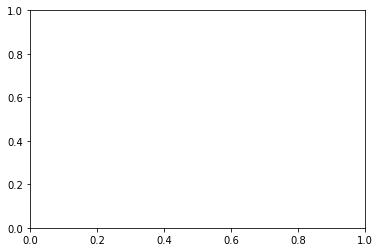

In [31]:
value = gen_data(time, 7)
plt.scatter(time, value, 'r')
plt.title('Dataset')
plt.xlabel('time -->')
plt.ylabel('value -->')

In [5]:
x = (time - np.mean(time)) / np.std(time)
X = np.zeros((x.shape[0], 2))
X[:, 0] = 1
X[:, 1] = x.transpose()
Y = np.zeros((x.shape[0], 1))
Y = (value - np.mean(value)) / np.std(value)

In [6]:
def costf(x, y, theta):
    m = y.shape[0]
    J = (1/(2*m)) * np.sum(np.power(x.dot(theta) - y, 2))
    return J

In [7]:
N = 30
J = np.zeros((N, N))
theta = np.zeros((2, N))
theta[0] = np.linspace(-1.5, 1.5, N)
theta[1] = np.linspace(-1, 2.9, N)
for i in range(0, N):
    for j in range(0, N):
        th = np.array([theta[0][i], theta[1][j]]).reshape(2, 1)
        J[i][j] = costf(X, Y, th)


Text(0, 0.5, 'Cost -->')

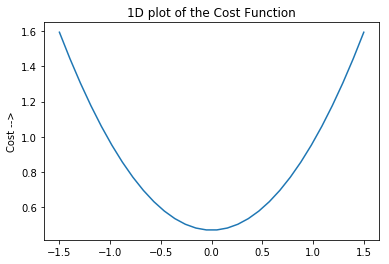

In [8]:
plt.plot(theta[0], J[:, 20])
plt.title('1D plot of the Cost Function')
plt.ylabel('Cost -->')

Text(0.5, 0.92, '3D plot of the Cost Function')

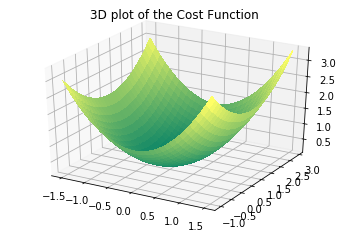

In [9]:
fig = plt.figure()
ax = fig.gca(projection='3d')
T0, T1 = np.meshgrid(theta[0], theta[1])
ax.plot_surface(T0, T1, J, cmap=cm.summer, linewidth=0, antialiased=False)
plt.title('3D plot of the Cost Function')

Text(0, 0.5, 'Theta_1 -->')

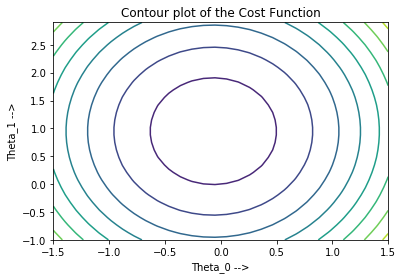

In [10]:
plt.contour(T0, T1, J)
plt.title('Contour plot of the Cost Function')
plt.xlabel('Theta_0 -->')
plt.ylabel('Theta_1 -->')

In [11]:
theta = np.zeros((2, 1))
alpha = 0.05
num_iter = 100
m = X.shape[0]
J = np.zeros((num_iter, 1))
for i in range(0, num_iter):
    J[i][0] = costf(X, Y, theta)
    err = X.dot(theta) - Y
    theta[0] = theta[0] - alpha * (1/m) * np.sum(err * X[:, 0].reshape(m, 1))
    theta[1] = theta[1] - alpha * (1/m) * np.sum(err * X[:, 1].reshape(m, 1))
print(theta)   

[[-5.00016695e-16]
 [ 8.58117680e-01]]


Text(0, 0.5, 'Cost -->')

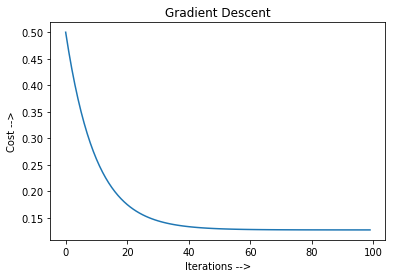

In [12]:
plt.plot(np.arange(0, num_iter), J)
plt.title('Gradient Descent')
plt.xlabel('Iterations -->')
plt.ylabel('Cost -->')

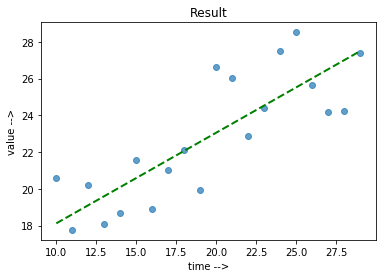

In [30]:
H = X.dot(theta)
x = (X[:, 1] * np.std(time)) + np.mean(time)
h = (H * np.std(value)) + np.mean(value)
plt.scatter(time, value, alpha = 0.7)
plt.plot(x, h, '--g', linewidth = 2)
plt.xlabel('time -->')
plt.ylabel('value -->')
plt.title('Result')
plt.show()